In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from model_1d import hjb_modified, hjb_modified_jump

Equation with damage function $j$:

\begin{align}
0 = \max_e  &-\delta \phi(y) + \delta\eta\log e  + \frac{d \phi}{d y}(y) \mu_2 e + (\eta-1)\left(\frac{d}{d \tau}\Lambda(y)\mu_2 e\right) + \frac{1}{\sqrt{2\pi}\sigma}\exp\{-\frac{(\bar{y}-y)^2}{2\sigma^2}\} \left[\bar{\phi}(y)-\phi(y)\right]\\
\end{align}

where

\begin{equation}
\Lambda(\tau)=
\begin{cases}
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2, & \tau\leq \bar{\tau} \\
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2 + \frac{\lambda_{2}^+}{2}(\tau-\bar{\tau})^2, & \tau > \bar{\tau}
\end{cases}
\end{equation}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y)\mu_2 + (\eta-1)\frac{d}{d \tau}\Lambda(y)\mu_2}
$$

Try $\sigma = \bar{y}/10$, $\sigma = \bar{y}/20$, $\sigma = \bar{y}/100$.

In [2]:
# Model parameters
η = .032
δ = .01
μ_2 = 1.86/1000.

# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.

# # Three damages
# λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
# λ_2p_prior = np.array([0.4875, 0.4875, 0.025])

# Two damages
λ_2p_state = np.array([0., 0.0197*2])
λ_2p_prior = np.array([0.5, 0.5])

In [3]:
# Grid setting
n_y = 100
y_min = 1e-10
y_max = 10.
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_list = []
e_list = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, e = hjb_modified(y_grid, model_paras=pde_paras, v0=None,
                        ϵ=.5, tol=1e-8, max_iter=10_000, bc=(0, 0), impose_bc=(False, False))
    ϕ_list.append(ϕ)
    e_list.append(e)

Iteration 1: LHS Error: 0.0012399145351601527; RHS Error 0.0014606468243815764
Iteration 2: LHS Error: 0.0011876787746095087; RHS Error 0.0013754243917120973
Iteration 3: LHS Error: 0.0011513420067673081; RHS Error 0.001295435545230069
Iteration 4: LHS Error: 0.0011211796888625876; RHS Error 0.0012301280923770648
Iteration 5: LHS Error: 0.0010928298046417526; RHS Error 0.0011747999870947738
Iteration 6: LHS Error: 0.0010651126685647314; RHS Error 0.0011269963952911556
Iteration 7: LHS Error: 0.0010380723005553967; RHS Error 0.0010854283491834888
Iteration 8: LHS Error: 0.0010122356929496094; RHS Error 0.0010492024024021658
Iteration 9: LHS Error: 0.0009880115799277486; RHS Error 0.0010175416981931856
Iteration 10: LHS Error: 0.0009655211360293393; RHS Error 0.0009897225098399402
Iteration 11: LHS Error: 0.000944787890739443; RHS Error 0.0009650857300969329
Iteration 12: LHS Error: 0.0009256793369696766; RHS Error 0.0009430601679140025
Iteration 13: LHS Error: 0.0009080176987850807; RHS

Iteration 315: LHS Error: 9.224459415665964e-05; RHS Error 9.212231564481165e-05
Iteration 316: LHS Error: 9.166645300577592e-05; RHS Error 9.154343834009418e-05
Iteration 317: LHS Error: 9.109217195669983e-05; RHS Error 9.096842834533107e-05
Iteration 318: LHS Error: 9.052172240416045e-05; RHS Error 9.039725697216499e-05
Iteration 319: LHS Error: 8.99550759918405e-05; RHS Error 8.982989578229972e-05
Iteration 320: LHS Error: 8.93922046098089e-05; RHS Error 8.926631658491395e-05
Iteration 321: LHS Error: 8.88330803920645e-05; RHS Error 8.870649143403347e-05
Iteration 322: LHS Error: 8.827767571369105e-05; RHS Error 8.815039262593193e-05
Iteration 323: LHS Error: 8.772596318862291e-05; RHS Error 8.759799269662729e-05
Iteration 324: LHS Error: 8.717791566691113e-05; RHS Error 8.70492644193206e-05
Iteration 325: LHS Error: 8.663350623228094e-05; RHS Error 8.650418080192134e-05
Iteration 326: LHS Error: 8.609270819978643e-05; RHS Error 8.596271508456424e-05
Iteration 327: LHS Error: 8.5555

Iteration 659: LHS Error: 1.1640065942425393e-05; RHS Error 1.1437741444929425e-05
Iteration 660: LHS Error: 1.1572199886247803e-05; RHS Error 1.1369829548340182e-05
Iteration 661: LHS Error: 1.1504736849049513e-05; RHS Error 1.1302320994762273e-05
Iteration 662: LHS Error: 1.1437674374462081e-05; RHS Error 1.1235213325354299e-05
Iteration 663: LHS Error: 1.13710100215908e-05; RHS Error 1.1168504096815057e-05
Iteration 664: LHS Error: 1.1304741364959181e-05; RHS Error 1.1102190881315125e-05
Iteration 665: LHS Error: 1.1238865994481206e-05; RHS Error 1.1036271266377383e-05
Iteration 666: LHS Error: 1.1173381515239278e-05; RHS Error 1.0970742854760573e-05
Iteration 667: LHS Error: 1.1108285547539731e-05; RHS Error 1.0905603264398252e-05
Iteration 668: LHS Error: 1.1043575726621402e-05; RHS Error 1.0840850128242458e-05
Iteration 669: LHS Error: 1.0979249702752769e-05; RHS Error 1.0776481094210903e-05
Iteration 670: LHS Error: 1.091530514089889e-05; RHS Error 1.071249382505828e-05
Iteratio

Iteration 1006: LHS Error: 1.5747426980183832e-06; RHS Error 4.019271979097193e-06
Iteration 1007: LHS Error: 1.565788025473247e-06; RHS Error 4.028102400116702e-06
Iteration 1008: LHS Error: 1.556884682479831e-06; RHS Error 4.036882247212582e-06
Iteration 1009: LHS Error: 1.5480323714844868e-06; RHS Error 4.045611813151837e-06
Iteration 1010: LHS Error: 1.539230796765434e-06; RHS Error 4.054291388998514e-06
Iteration 1011: LHS Error: 1.5304796642662266e-06; RHS Error 4.062921264100694e-06
Iteration 1012: LHS Error: 1.521778681692898e-06; RHS Error 4.071501726108815e-06
Iteration 1013: LHS Error: 1.5131275585555937e-06; RHS Error 4.080033060988573e-06
Iteration 1014: LHS Error: 1.504526005891016e-06; RHS Error 4.08851555301615e-06
Iteration 1015: LHS Error: 1.4959737366093684e-06; RHS Error 4.09694948480489e-06
Iteration 1016: LHS Error: 1.4874704652445558e-06; RHS Error 4.105335137312123e-06
Iteration 1017: LHS Error: 1.4790159079125509e-06; RHS Error 4.113672789840799e-06
Iteration 1

Iteration 1352: LHS Error: 2.2158324872179058e-07; RHS Error 5.354287022429427e-06
Iteration 1353: LHS Error: 2.2033662430698264e-07; RHS Error 5.355517746521835e-06
Iteration 1354: LHS Error: 2.1909703530609281e-07; RHS Error 5.356741527276737e-06
Iteration 1355: LHS Error: 2.178644417510922e-07; RHS Error 5.3579584040647655e-06
Iteration 1356: LHS Error: 2.1663880397926327e-07; RHS Error 5.359168416031474e-06
Iteration 1357: LHS Error: 2.1542008252217748e-07; RHS Error 5.3603716021197786e-06
Iteration 1358: LHS Error: 2.1420823810569534e-07; RHS Error 5.361568001024421e-06
Iteration 1359: LHS Error: 2.1300323178874425e-07; RHS Error 5.362757651243793e-06
Iteration 1360: LHS Error: 2.1180502471351836e-07; RHS Error 5.3639405910395e-06
Iteration 1361: LHS Error: 2.1061357832752314e-07; RHS Error 5.365116858457061e-06
Iteration 1362: LHS Error: 2.094288542447975e-07; RHS Error 5.366286491333074e-06
Iteration 1363: LHS Error: 2.0825081438469173e-07; RHS Error 5.3674495272759085e-06
Itera

Iteration 1695: LHS Error: 3.207243701175422e-08; RHS Error 5.541405073509098e-06
Iteration 1696: LHS Error: 3.189205192988265e-08; RHS Error 5.5415831763585156e-06
Iteration 1697: LHS Error: 3.1712678039141906e-08; RHS Error 5.541760280579778e-06
Iteration 1698: LHS Error: 3.153430955249448e-08; RHS Error 5.541936391770079e-06
Iteration 1699: LHS Error: 3.135694091882524e-08; RHS Error 5.542111515494412e-06
Iteration 1700: LHS Error: 3.118056644824119e-08; RHS Error 5.542285657294784e-06
Iteration 1701: LHS Error: 3.100518065901614e-08; RHS Error 5.542458822665173e-06
Iteration 1702: LHS Error: 3.083077795840161e-08; RHS Error 5.542631017087631e-06
Iteration 1703: LHS Error: 3.065735285079363e-08; RHS Error 5.542802246002033e-06
Iteration 1704: LHS Error: 3.048489985446601e-08; RHS Error 5.542972514824946e-06
Iteration 1705: LHS Error: 3.0313413487692564e-08; RHS Error 5.543141828937047e-06
Iteration 1706: LHS Error: 3.014288835201384e-08; RHS Error 5.543310193688333e-06
Iteration 170

Iteration 120: LHS Error: 0.0003085405849114903; RHS Error 0.0003098485210714227
Iteration 121: LHS Error: 0.0003057072720002024; RHS Error 0.0003070037547360607
Iteration 122: LHS Error: 0.0003028991953603205; RHS Error 0.00030418427933416744
Iteration 123: LHS Error: 0.00030011617195925544; RHS Error 0.0003013899130660351
Iteration 124: LHS Error: 0.0002973580184098962; RHS Error 0.0002986204737430514
Iteration 125: LHS Error: 0.0002946245510110912; RHS Error 0.00029587577882273484
Iteration 126: LHS Error: 0.00029191558579137744; RHS Error 0.00029315564544814656
Iteration 127: LHS Error: 0.00028923093855573456; RHS Error 0.0002904598904911361
Iteration 128: LHS Error: 0.0002865704249350315; RHS Error 0.0002877883305985519
Iteration 129: LHS Error: 0.000283933860436833; RHS Error 0.0002851407822408623
Iteration 130: LHS Error: 0.0002813210604979133; RHS Error 0.0002825170617625916
Iteration 131: LHS Error: 0.00027873184053728295; RHS Error 0.000279916985434075
Iteration 132: LHS Erro

Iteration 438: LHS Error: 5.857061764888427e-05; RHS Error 5.872901237922296e-05
Iteration 439: LHS Error: 5.828120861034458e-05; RHS Error 5.843940642098327e-05
Iteration 440: LHS Error: 5.7993229036532035e-05; RHS Error 5.815123130236576e-05
Iteration 441: LHS Error: 5.770667187236789e-05; RHS Error 5.786447995694428e-05
Iteration 442: LHS Error: 5.742153009755113e-05; RHS Error 5.757914535316314e-05
Iteration 443: LHS Error: 5.713779672635033e-05; RHS Error 5.7295220494166775e-05
Iteration 444: LHS Error: 5.685546480746484e-05; RHS Error 5.701269841762858e-05
Iteration 445: LHS Error: 5.657452742384439e-05; RHS Error 5.6731572195580274e-05
Iteration 446: LHS Error: 5.629497769260583e-05; RHS Error 5.6451834934242084e-05
Iteration 447: LHS Error: 5.601680876472781e-05; RHS Error 5.617347977385559e-05
Iteration 448: LHS Error: 5.5740013824912005e-05; RHS Error 5.589649988851529e-05
Iteration 449: LHS Error: 5.546458609154148e-05; RHS Error 5.56208884860015e-05
Iteration 450: LHS Error

Iteration 755: LHS Error: 1.2178408115348649e-05; RHS Error 1.6287019612691762e-05
Iteration 756: LHS Error: 1.2118210993228296e-05; RHS Error 1.6291862041688558e-05
Iteration 757: LHS Error: 1.2058311381429876e-05; RHS Error 1.6296715351387346e-05
Iteration 758: LHS Error: 1.1998707809879328e-05; RHS Error 1.6301579258089065e-05
Iteration 759: LHS Error: 1.1939398815732916e-05; RHS Error 1.6306453481085368e-05
Iteration 760: LHS Error: 1.1880382943349477e-05; RHS Error 1.6311337742636294e-05
Iteration 761: LHS Error: 1.1821658744373686e-05; RHS Error 1.6316231767941913e-05
Iteration 762: LHS Error: 1.1763224777500136e-05; RHS Error 1.632113528511614e-05
Iteration 763: LHS Error: 1.1705079608584357e-05; RHS Error 1.6326048025159037e-05
Iteration 764: LHS Error: 1.164722181055955e-05; RHS Error 1.633096972193616e-05
Iteration 765: LHS Error: 1.1589649963436588e-05; RHS Error 1.6335900112149067e-05
Iteration 766: LHS Error: 1.1532362654206874e-05; RHS Error 1.6340838935311678e-05
Iterati

Iteration 1079: LHS Error: 2.4449660364911363e-06; RHS Error 1.766223267775027e-05
Iteration 1080: LHS Error: 2.432878587893539e-06; RHS Error 1.76650115587534e-05
Iteration 1081: LHS Error: 2.4208508916934157e-06; RHS Error 1.7667781135710875e-05
Iteration 1082: LHS Error: 2.4088826526408313e-06; RHS Error 1.767054142742195e-05
Iteration 1083: LHS Error: 2.396973576748729e-06; RHS Error 1.7673292452765406e-05
Iteration 1084: LHS Error: 2.3851233716537523e-06; RHS Error 1.767603423069613e-05
Iteration 1085: LHS Error: 2.3733317462970582e-06; RHS Error 1.767876678024355e-05
Iteration 1086: LHS Error: 2.361598411187993e-06; RHS Error 1.7681490120512015e-05
Iteration 1087: LHS Error: 2.349923078182048e-06; RHS Error 1.768420427067808e-05
Iteration 1088: LHS Error: 2.338305460591883e-06; RHS Error 1.7686909249988174e-05
Iteration 1089: LHS Error: 2.326745273117936e-06; RHS Error 1.768960507775915e-05
Iteration 1090: LHS Error: 2.3152422319178134e-06; RHS Error 1.7692291773377302e-05
Iterat

Iteration 1403: LHS Error: 4.907345474286506e-07; RHS Error 1.8189606589989933e-05
Iteration 1404: LHS Error: 4.883081043544069e-07; RHS Error 1.81904081974754e-05
Iteration 1405: LHS Error: 4.858936578089335e-07; RHS Error 1.819120647342709e-05
Iteration 1406: LHS Error: 4.834911485201987e-07; RHS Error 1.81920014306008e-05
Iteration 1407: LHS Error: 4.811005174937266e-07; RHS Error 1.8192793081711406e-05
Iteration 1408: LHS Error: 4.787217059570859e-07; RHS Error 1.819358143943285e-05
Iteration 1409: LHS Error: 4.7635465558193424e-07; RHS Error 1.8194366516398688e-05
Iteration 1410: LHS Error: 4.7399930810931856e-07; RHS Error 1.8195148325201498e-05
Iteration 1411: LHS Error: 4.716556057243748e-07; RHS Error 1.8195926878392598e-05
Iteration 1412: LHS Error: 4.6932349088979475e-07; RHS Error 1.8196702188485038e-05
Iteration 1413: LHS Error: 4.670029062764369e-07; RHS Error 1.8197474267950232e-05
Iteration 1414: LHS Error: 4.646937948882268e-07; RHS Error 1.8198243129218395e-05
Iterati

Iteration 1721: LHS Error: 1.0144787462862404e-07; RHS Error 1.832934766828341e-05
Iteration 1722: LHS Error: 1.0094619912193181e-07; RHS Error 1.8329549804588664e-05
Iteration 1723: LHS Error: 1.004470043114436e-07; RHS Error 1.8329751040847006e-05
Iteration 1724: LHS Error: 9.995027785980604e-08; RHS Error 1.832995138093934e-05
Iteration 1725: LHS Error: 9.9456007610077e-08; RHS Error 1.8330150828729005e-05
Iteration 1726: LHS Error: 9.896418143306995e-08; RHS Error 1.8330349388066976e-05
Iteration 1727: LHS Error: 9.847478719959835e-08; RHS Error 1.8330547062784608e-05
Iteration 1728: LHS Error: 9.798781290537573e-08; RHS Error 1.833074385670057e-05
Iteration 1729: LHS Error: 9.750324660162679e-08; RHS Error 1.833093977361667e-05
Iteration 1730: LHS Error: 9.702107633957624e-08; RHS Error 1.83311348173197e-05
Iteration 1731: LHS Error: 9.654129029534886e-08; RHS Error 1.8331328991579108e-05
Iteration 1732: LHS Error: 9.606387672833616e-08; RHS Error 1.8331522300152467e-05
Iteration 

Iteration 2042: LHS Error: 2.0658172478205117e-08; RHS Error 1.8363692423630775e-05
Iteration 2043: LHS Error: 2.0556001678606606e-08; RHS Error 1.83637394059022e-05
Iteration 2044: LHS Error: 2.0454336127628814e-08; RHS Error 1.8363786171877734e-05
Iteration 2045: LHS Error: 2.0353173341147723e-08; RHS Error 1.83638327225389e-05
Iteration 2046: LHS Error: 2.025251087667268e-08; RHS Error 1.8363879058860345e-05
Iteration 2047: LHS Error: 2.0152346180690728e-08; RHS Error 1.836392518181259e-05
Iteration 2048: LHS Error: 2.0052676866222363e-08; RHS Error 1.836397109236166e-05
Iteration 2049: LHS Error: 1.9953500476899144e-08; RHS Error 1.8364016791470492e-05
Iteration 2050: LHS Error: 1.9854814528597053e-08; RHS Error 1.8364062280096867e-05
Iteration 2051: LHS Error: 1.9756616634336588e-08; RHS Error 1.836410755919434e-05
Iteration 2052: LHS Error: 1.965890436550488e-08; RHS Error 1.836415262971235e-05
Iteration 2053: LHS Error: 1.956167533512243e-08; RHS Error 1.8364197492596213e-05
Ite

Text(0.5, 0, 'y')

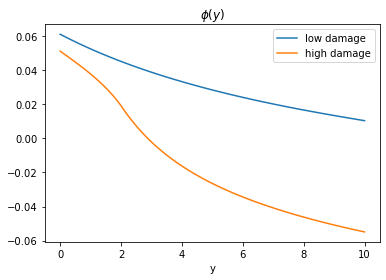

In [4]:
plt.plot(y_grid, ϕ_list[0], label='low damage')
plt.plot(y_grid, ϕ_list[1], label='high damage')
plt.legend()
plt.title(r'$\phi(y)$')
plt.xlabel('y')

In [52]:
y_step = .01
y_grid_short = np.arange(y_step, 2., y_step)

ϕ_bar = np.average(ϕ_list, axis=0, weights=[0.5, 0.5])
ϕ_bar = np.interp(y_grid_short, y_grid, ϕ_bar)

pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_bar/.01, ϕ_bar)
ϕ_grid_001, e_grid_001 = hjb_modified_jump(y_grid_short, model_paras=pde_paras, v0=None,
                                   ϵ=.5, tol=1e-8, max_iter=1000)

pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_bar/10, ϕ_bar)
ϕ_grid_10, e_grid_10 = hjb_modified_jump(y_grid_short, model_paras=pde_paras, v0=None,
                                   ϵ=.5, tol=1e-8, max_iter=1000)

pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_bar/20, ϕ_bar)
ϕ_grid_20, e_grid_20 = hjb_modified_jump(y_grid_short, model_paras=pde_paras, v0=None,
                                   ϵ=.5, tol=1e-8, max_iter=1000)

pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_bar/100, ϕ_bar)
ϕ_grid_100, e_grid_100 = hjb_modified_jump(y_grid_short, model_paras=pde_paras, v0=None,
                                   ϵ=.5, tol=1e-8, max_iter=1000)

Iteration 1: LHS Error: 0.0013575333497310683; RHS Error 0.0015710761033781947
Iteration 2: LHS Error: 0.0012920197702996888; RHS Error 0.0014653948430230956
Iteration 3: LHS Error: 0.0012480072197203688; RHS Error 0.00138042098406226
Iteration 4: LHS Error: 0.0012112579061976918; RHS Error 0.0013128287808591137
Iteration 5: LHS Error: 0.001177694688080046; RHS Error 0.001255355033781322
Iteration 6: LHS Error: 0.001146282728305907; RHS Error 0.0012055838751307167
Iteration 7: LHS Error: 0.0011168593740176341; RHS Error 0.0011624282261274053
Iteration 8: LHS Error: 0.0010896052361765874; RHS Error 0.0011250269975060538
Iteration 9: LHS Error: 0.0010644153248642648; RHS Error 0.0010925572173697295
Iteration 10: LHS Error: 0.0010412690243091164; RHS Error 0.0010641539485605075
Iteration 11: LHS Error: 0.0010199022059519114; RHS Error 0.0010390423924424225
Iteration 12: LHS Error: 0.0010001895987931213; RHS Error 0.0010165389478178969
Iteration 13: LHS Error: 0.0009818394176741036; RHS Er

Iteration 179: LHS Error: 0.00020218974889939234; RHS Error 0.00020319029209812413
Iteration 180: LHS Error: 0.00020080360222014815; RHS Error 0.00020318213142544398
Iteration 181: LHS Error: 0.00019922762735660737; RHS Error 0.00019939476784178417
Iteration 182: LHS Error: 0.0001980266372873657; RHS Error 0.0001980097827307875
Iteration 183: LHS Error: 0.00019723737606693048; RHS Error 0.00019742660188499855
Iteration 184: LHS Error: 0.00019461033237885839; RHS Error 0.0001954294707035187
Iteration 185: LHS Error: 0.00019304402089573292; RHS Error 0.00019405488266959901
Iteration 186: LHS Error: 0.00019203985427497516; RHS Error 0.00019186138548590403
Iteration 187: LHS Error: 0.0001919458373849936; RHS Error 0.0001929199016846518
Iteration 188: LHS Error: 0.00018936690936166567; RHS Error 0.00019030136458744002
Iteration 189: LHS Error: 0.00018798601029830497; RHS Error 0.00018754209563326516
Iteration 190: LHS Error: 0.00018646919668445505; RHS Error 0.00018786092801069952
Iteration

Iteration 392: LHS Error: 3.751621887704282e-05; RHS Error 3.8110663816723865e-05
Iteration 393: LHS Error: 3.740906194114879e-05; RHS Error 3.9539228901091334e-05
Iteration 394: LHS Error: 3.936142748008076e-05; RHS Error 3.674278583951432e-05
Iteration 395: LHS Error: 3.7897564286237806e-05; RHS Error 3.884702044964334e-05
Iteration 396: LHS Error: 3.602503896986409e-05; RHS Error 3.692950171306454e-05
Iteration 397: LHS Error: 3.6368230486291675e-05; RHS Error 3.8940012295267563e-05
Iteration 398: LHS Error: 3.884272145665557e-05; RHS Error 3.569878392521697e-05
Iteration 399: LHS Error: 3.7015126199163584e-05; RHS Error 3.807698969236729e-05
Iteration 400: LHS Error: 3.4928001113126994e-05; RHS Error 3.591438439546268e-05
Iteration 401: LHS Error: 3.535279718250295e-05; RHS Error 3.8489553629869654e-05
Iteration 402: LHS Error: 3.816470512674197e-05; RHS Error 3.4682227109266795e-05
Iteration 403: LHS Error: 3.621039080524413e-05; RHS Error 3.766561344531244e-05
Iteration 404: LHS 

Iteration 602: LHS Error: 7.526950935712873e-06; RHS Error 8.165377440036772e-06
Iteration 603: LHS Error: 7.986998280862245e-06; RHS Error 1.1211144959512396e-05
Iteration 604: LHS Error: 1.094221248733318e-05; RHS Error 7.5304108369416735e-06
Iteration 605: LHS Error: 9.35641278741739e-06; RHS Error 1.058035381282219e-05
Iteration 606: LHS Error: 7.262886631831389e-06; RHS Error 7.992373700747716e-06
Iteration 607: LHS Error: 7.860440605328423e-06; RHS Error 1.1728485773879584e-05
Iteration 608: LHS Error: 1.0518871896111892e-05; RHS Error 7.389710203453562e-06
Iteration 609: LHS Error: 8.848430762084525e-06; RHS Error 8.751687320541829e-06
Iteration 610: LHS Error: 7.408909391382057e-06; RHS Error 7.693950953227861e-06
Iteration 611: LHS Error: 7.39725378622047e-06; RHS Error 9.787460479469042e-06
Iteration 612: LHS Error: 9.628795636193455e-06; RHS Error 6.961547876479417e-06
Iteration 613: LHS Error: 8.505854274851177e-06; RHS Error 9.390998160829778e-06
Iteration 614: LHS Error: 

Iteration 817: LHS Error: 4.113857497947682e-06; RHS Error 1.500449585368482e-06
Iteration 818: LHS Error: 3.067709238233074e-06; RHS Error 3.8810914674632276e-06
Iteration 819: LHS Error: 1.817035297557723e-06; RHS Error 2.0215840679286244e-06
Iteration 820: LHS Error: 1.9367184639490498e-06; RHS Error 4.6185546040708545e-06
Iteration 821: LHS Error: 4.6123525220820305e-06; RHS Error 1.5341263115971164e-06
Iteration 822: LHS Error: 3.2134443489345577e-06; RHS Error 4.029741662057084e-06
Iteration 823: LHS Error: 1.8351804094429713e-06; RHS Error 2.063310953100573e-06
Iteration 824: LHS Error: 1.9569461219975937e-06; RHS Error 5.048380058498029e-06
Iteration 825: LHS Error: 4.84811371363747e-06; RHS Error 1.548670871897185e-06
Iteration 826: LHS Error: 3.3816338048386907e-06; RHS Error 4.487413831590374e-06
Iteration 827: LHS Error: 2.0876835918337555e-06; RHS Error 2.065412248857543e-06
Iteration 828: LHS Error: 2.000517191180773e-06; RHS Error 5.663603474101355e-06
Iteration 829: LHS

Iteration 2: LHS Error: 0.01724120512074504; RHS Error 0.01836449208983515
Iteration 3: LHS Error: 0.01062051287430587; RHS Error 0.010655552574136886
Iteration 4: LHS Error: 0.007436161691514641; RHS Error 0.0074599481455567395
Iteration 5: LHS Error: 0.005572387821251426; RHS Error 0.027031721531414112
Iteration 6: LHS Error: 0.004343690664487317; RHS Error 0.04270826108018953
Iteration 7: LHS Error: 0.003459853663513743; RHS Error 0.049989872996801264
Iteration 8: LHS Error: 0.0027877916812971693; RHS Error 0.04897312845802375
Iteration 9: LHS Error: 0.0022478046557327033; RHS Error 0.042454676617507424
Iteration 10: LHS Error: 0.0023237264135173782; RHS Error 0.03359353596200249
Iteration 11: LHS Error: 0.002494305082690544; RHS Error 0.4705658675628065
Iteration 12: LHS Error: 0.0026567076236045546; RHS Error 0.42843972547382725
Iteration 13: LHS Error: 0.002795453758167407; RHS Error 0.1146809704811671
Iteration 14: LHS Error: 0.003140504386223519; RHS Error 0.007004530682621988


Iteration 144: LHS Error: 0.000553279472060117; RHS Error 0.0006057886750362414
Iteration 145: LHS Error: 0.0005370936625787165; RHS Error 0.0005498087955818166
Iteration 146: LHS Error: 0.0005231990267057646; RHS Error 0.0005358855118299183
Iteration 147: LHS Error: 0.0005136819209851651; RHS Error 0.0005279914091352548
Iteration 148: LHS Error: 0.0005071419327423998; RHS Error 0.0005198554060913997
Iteration 149: LHS Error: 0.0005006858511583112; RHS Error 0.0005127263640126202
Iteration 150: LHS Error: 0.0004935901284155303; RHS Error 0.0005084798038789305
Iteration 151: LHS Error: 0.00048076183780373927; RHS Error 0.0004935602716991572
Iteration 152: LHS Error: 0.00047349302870577925; RHS Error 0.0004786863266021031
Iteration 153: LHS Error: 0.0004680340138420447; RHS Error 0.00046802244014452436
Iteration 154: LHS Error: 0.00046343484762723097; RHS Error 0.00046249122900057023
Iteration 155: LHS Error: 0.0004584975306251571; RHS Error 0.00045749451528759506
Iteration 156: LHS Erro

Iteration 293: LHS Error: 2.9061810263852905e-07; RHS Error 6.35521959010954e-06
Iteration 294: LHS Error: 2.375754778599637e-07; RHS Error 6.355221659336274e-06
Iteration 295: LHS Error: 1.9065252079841777e-07; RHS Error 6.355223528396736e-06
Iteration 296: LHS Error: 1.4920836544085603e-07; RHS Error 6.355225216685134e-06
Iteration 297: LHS Error: 1.2354608103226639e-07; RHS Error 6.3552266778080235e-06
Iteration 298: LHS Error: 1.2220652999272996e-07; RHS Error 6.355227949048081e-06
Iteration 299: LHS Error: 1.2095178869575562e-07; RHS Error 6.355229082925795e-06
Iteration 300: LHS Error: 1.196937059189107e-07; RHS Error 6.355230114989119e-06
Iteration 301: LHS Error: 1.1841438325721487e-07; RHS Error 6.3552309503209226e-06
Iteration 302: LHS Error: 1.1713133432622591e-07; RHS Error 6.355231596567867e-06
Iteration 303: LHS Error: 1.15931003977221e-07; RHS Error 6.355232102038533e-06
Iteration 304: LHS Error: 1.1470694964710315e-07; RHS Error 6.355232501822905e-06
Iteration 305: LHS 

Iteration 102: LHS Error: 0.0009345963486427772; RHS Error 0.004643661815040652
Iteration 103: LHS Error: 0.001151993560425696; RHS Error 0.0030995154994148963
Iteration 104: LHS Error: 0.0013436030057065868; RHS Error 0.009621842486044885
Iteration 105: LHS Error: 0.0015007055460287966; RHS Error 0.009872953819444025
Iteration 106: LHS Error: 0.0013466172256951098; RHS Error 0.002735025615310116
Iteration 107: LHS Error: 0.0010550968147357842; RHS Error 0.0020802738010200867
Iteration 108: LHS Error: 0.0010876890176701598; RHS Error 0.0023192958333220215
Iteration 109: LHS Error: 0.0014968603613866177; RHS Error 0.007258992233816115
Iteration 110: LHS Error: 0.001125128619025438; RHS Error 0.022052344313185604
Iteration 111: LHS Error: 0.0012993827149798132; RHS Error 0.014407019039326816
Iteration 112: LHS Error: 0.002662841450837644; RHS Error 0.00788678448297216
Iteration 113: LHS Error: 0.0009640036879298847; RHS Error 0.003922642741920864
Iteration 114: LHS Error: 0.0007978078159

Iteration 302: LHS Error: 5.761316482263967e-06; RHS Error 7.257247947797807e-06
Iteration 303: LHS Error: 5.348676021005305e-06; RHS Error 5.736694858267605e-06
Iteration 304: LHS Error: 4.959234257528866e-06; RHS Error 5.327636246667288e-06
Iteration 305: LHS Error: 4.5908368099673025e-06; RHS Error 4.9813995112932274e-06
Iteration 306: LHS Error: 4.243022870789592e-06; RHS Error 5.069374240249808e-06
Iteration 307: LHS Error: 3.9175299117177875e-06; RHS Error 7.2572912018786795e-06
Iteration 308: LHS Error: 3.6074665654556304e-06; RHS Error 5.095931673821524e-06
Iteration 309: LHS Error: 3.3177018296526306e-06; RHS Error 4.971178579161323e-06
Iteration 310: LHS Error: 3.0459740652938327e-06; RHS Error 4.981287129474099e-06
Iteration 311: LHS Error: 2.7917252372472445e-06; RHS Error 5.069265025935132e-06
Iteration 312: LHS Error: 2.556606988918242e-06; RHS Error 7.257333377003183e-06
Iteration 313: LHS Error: 2.3336495915543543e-06; RHS Error 5.095812557712187e-06
Iteration 314: LHS 

Iteration 452: LHS Error: 2.407754319755373e-06; RHS Error 7.257401519356055e-06
Iteration 453: LHS Error: 1.2942781923708235e-06; RHS Error 5.095570135910804e-06
Iteration 454: LHS Error: 5.013568061262852e-07; RHS Error 4.970848130118194e-06
Iteration 455: LHS Error: 3.4146176437765963e-07; RHS Error 4.98099005016156e-06
Iteration 456: LHS Error: 2.8477344002353355e-07; RHS Error 5.069003632337393e-06
Iteration 457: LHS Error: 2.4077543040873506e-06; RHS Error 7.257401503146799e-06
Iteration 458: LHS Error: 1.2942781868197084e-06; RHS Error 5.095570138394928e-06
Iteration 459: LHS Error: 5.013568148276581e-07; RHS Error 4.970848137036271e-06
Iteration 460: LHS Error: 3.414617377461848e-07; RHS Error 4.980990057405765e-06
Iteration 461: LHS Error: 2.847734222183318e-07; RHS Error 5.069003629166319e-06
Iteration 462: LHS Error: 2.4077542676581576e-06; RHS Error 7.257401490851079e-06
Iteration 463: LHS Error: 1.294278179062025e-06; RHS Error 5.09557013129297e-06
Iteration 464: LHS Error

Iteration 604: LHS Error: 5.013568120382228e-07; RHS Error 4.97084813371948e-06
Iteration 605: LHS Error: 3.41461748459837e-07; RHS Error 4.980990055313689e-06
Iteration 606: LHS Error: 2.8477344196642385e-07; RHS Error 5.069003630620017e-06
Iteration 607: LHS Error: 2.4077542907369187e-06; RHS Error 7.25740150044063e-06
Iteration 608: LHS Error: 1.2942781863062303e-06; RHS Error 5.095570138981265e-06
Iteration 609: LHS Error: 5.013568145223468e-07; RHS Error 4.970848138396294e-06
Iteration 610: LHS Error: 3.4146177746441353e-07; RHS Error 4.980990063189333e-06
Iteration 611: LHS Error: 2.847734347360964e-07; RHS Error 5.069003649244008e-06
Iteration 612: LHS Error: 2.407754348079938e-06; RHS Error 7.257401510946115e-06
Iteration 613: LHS Error: 1.2942781946745363e-06; RHS Error 5.095570145711992e-06
Iteration 614: LHS Error: 5.013567955097775e-07; RHS Error 4.970848139870809e-06
Iteration 615: LHS Error: 3.4146174092419823e-07; RHS Error 4.980990051424439e-06
Iteration 616: LHS Error:

Iteration 758: LHS Error: 1.2942781867919528e-06; RHS Error 5.095570144386663e-06
Iteration 759: LHS Error: 5.01356813856213e-07; RHS Error 4.970848138708545e-06
Iteration 760: LHS Error: 3.414617491259708e-07; RHS Error 4.9809900587033384e-06
Iteration 761: LHS Error: 2.847734306560268e-07; RHS Error 5.069003634949887e-06
Iteration 762: LHS Error: 2.4077542889883174e-06; RHS Error 7.2574014888387994e-06
Iteration 763: LHS Error: 1.2942781772717904e-06; RHS Error 5.095570134797112e-06
Iteration 764: LHS Error: 5.013568254857992e-07; RHS Error 4.970848132602318e-06
Iteration 765: LHS Error: 3.4146173065463525e-07; RHS Error 4.9809900559243114e-06
Iteration 766: LHS Error: 2.847734461020046e-07; RHS Error 5.069003631053698e-06
Iteration 767: LHS Error: 2.4077542992440026e-06; RHS Error 7.257401500357363e-06
Iteration 768: LHS Error: 1.2942781893038324e-06; RHS Error 5.095570138686362e-06
Iteration 769: LHS Error: 5.013567996869916e-07; RHS Error 4.970848139908973e-06
Iteration 770: LHS E

Iteration 905: LHS Error: 3.414617828489952e-07; RHS Error 4.980990042841027e-06
Iteration 906: LHS Error: 2.847734493216514e-07; RHS Error 5.069003628479368e-06
Iteration 907: LHS Error: 2.4077543243766764e-06; RHS Error 7.257401504145999e-06
Iteration 908: LHS Error: 1.2942781886932098e-06; RHS Error 5.095570135948968e-06
Iteration 909: LHS Error: 5.013568169232041e-07; RHS Error 4.970848134021322e-06
Iteration 910: LHS Error: 3.414617447405899e-07; RHS Error 4.980990055816759e-06
Iteration 911: LHS Error: 2.8477345766220186e-07; RHS Error 5.069003635387037e-06
Iteration 912: LHS Error: 2.407754310415622e-06; RHS Error 7.257401497692828e-06
Iteration 913: LHS Error: 1.294278185862141e-06; RHS Error 5.095570143161948e-06
Iteration 914: LHS Error: 5.013568116080114e-07; RHS Error 4.970848141591655e-06
Iteration 915: LHS Error: 3.4146173689963977e-07; RHS Error 4.980990059834378e-06
Iteration 916: LHS Error: 2.8477344048150055e-07; RHS Error 5.069003632351271e-06
Iteration 917: LHS Erro

Iteration 80: LHS Error: 0.0014189688176472134; RHS Error 0.0011233539561901493
Iteration 81: LHS Error: 0.0027341240715881288; RHS Error 0.002168687165503176
Iteration 82: LHS Error: 0.0017419657228642804; RHS Error 0.00455945619281003
Iteration 83: LHS Error: 0.0010623732192325472; RHS Error 0.003353827028143376
Iteration 84: LHS Error: 0.0010475731680256034; RHS Error 0.0015905025392416172
Iteration 85: LHS Error: 0.0012448221255553643; RHS Error 0.0023322071031540424
Iteration 86: LHS Error: 0.0017644191316749103; RHS Error 0.0017004756938449883
Iteration 87: LHS Error: 0.0009847987019320562; RHS Error 0.001493893552529879
Iteration 88: LHS Error: 0.0010825558752085435; RHS Error 0.0010839463754535863
Iteration 89: LHS Error: 0.0019960163924527888; RHS Error 0.0008396006906375561
Iteration 90: LHS Error: 0.0009683441053204844; RHS Error 0.0016487642163443596
Iteration 91: LHS Error: 0.0008164386175065624; RHS Error 0.0011057719019266904
Iteration 92: LHS Error: 0.001733738417930681

Iteration 262: LHS Error: 4.715741089104941e-05; RHS Error 4.8248796399390204e-05
Iteration 263: LHS Error: 4.5856805499927544e-05; RHS Error 4.693418108782702e-05
Iteration 264: LHS Error: 4.4576454525671605e-05; RHS Error 4.563982584152146e-05
Iteration 265: LHS Error: 4.33162599818987e-05; RHS Error 4.436562755571474e-05
Iteration 266: LHS Error: 4.207613003733013e-05; RHS Error 4.311148873665594e-05
Iteration 267: LHS Error: 4.0855977848419656e-05; RHS Error 4.18773174478697e-05
Iteration 268: LHS Error: 3.965572239995885e-05; RHS Error 4.06630271944544e-05
Iteration 269: LHS Error: 3.847528759919061e-05; RHS Error 3.9468536847405366e-05
Iteration 270: LHS Error: 3.7314602535268304e-05; RHS Error 3.829377051685649e-05
Iteration 271: LHS Error: 3.617360126005609e-05; RHS Error 3.713865743394586e-05
Iteration 272: LHS Error: 3.5052222683684686e-05; RHS Error 3.600313181297075e-05
Iteration 273: LHS Error: 3.395041020801126e-05; RHS Error 3.488713269982763e-05
Iteration 274: LHS Error

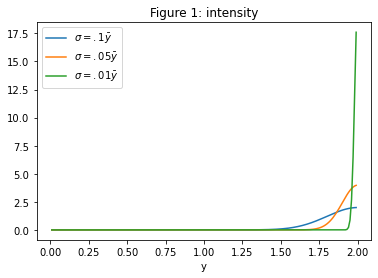

In [54]:
def density(y, σ, λ_bar):
    res = 1./(np.sqrt(2*np.pi)*σ)*np.exp(-(λ_bar-y)**2/(2*σ**2))
    return res

density_grid_10 = density(y_grid_short, λ_bar/10., λ_bar)
density_grid_20 = density(y_grid_short, λ_bar/20., λ_bar)
density_grid_100 = density(y_grid_short, λ_bar/100., λ_bar)

plt.plot(y_grid_short, density_grid_10, label=r'$\sigma=.1 \bar{y}$')
plt.plot(y_grid_short, density_grid_20, label=r'$\sigma=.05 \bar{y}$')
plt.plot(y_grid_short, density_grid_100, label=r'$\sigma=.01 \bar{y}$')
plt.legend()
plt.xlabel('y')
plt.title('Figure 1: intensity')
plt.savefig('fig_1.pdf')

In [50]:
ϕ_bar = np.average(ϕ_list, axis=0, weights=[0.5, 0.5])
y_grid_after = np.arange(2., 10., y_step)
ϕ_bar_after = np.interp(y_grid_after, y_grid, ϕ_bar)

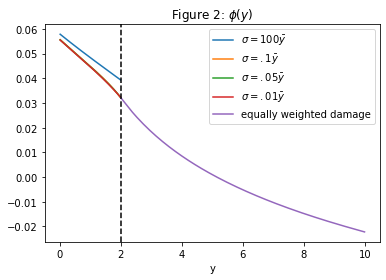

In [63]:
plt.plot(y_grid_short, ϕ_grid_001, label=r'$\sigma=100\bar{y}$')
plt.plot(y_grid_short, ϕ_grid_10, label=r'$\sigma=.1\bar{y}$')
plt.plot(y_grid_short, ϕ_grid_20, label=r'$\sigma=.05\bar{y}$')
plt.plot(y_grid_short, ϕ_grid_100, label=r'$\sigma=.01\bar{y}$')
plt.plot(y_grid_after, ϕ_bar_after, label='equally weighted damage')
plt.legend()
plt.axvline(x=2., linestyle='dashed', color='black')
plt.title(r'Figure 2: $\phi(y)$')
plt.xlabel('y')
plt.savefig('fig_2.pdf')

In [66]:
np.save('check.npy', ϕ_grid_100)